In [ ]:
!pip install keras_resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=87a588481554c7cd7103e6367d2807e4680011096d28b87853dc1b0420624a07
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet


In [ ]:
import pandas as pd
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import BatchNormalization, Input,Conv2D, Activation, MaxPooling2D,MaxPooling2D,AveragePooling2D, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras.layers import Dropout, Flatten, Concatenate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import keras_resnet.models
import keras
from keras import callbacks
from keras.models import model_from_json
import h5py
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
Y=np.zeros((y_train.shape))
X=[]
for i,x in enumerate(x_train):
  x=x.astype(float)
  if i%2==0:
    X.append(np.flipud(x))
    Y[i]=1
  else:
    X.append(x)
    Y[i]=0
X=np.array(X)

Y_t=np.zeros((y_test.shape))
X_t=[]
for i,x in enumerate(x_test):
  x=x.astype(float)
  if i%2==0:
    X_t.append(np.flipud(x))
    Y_t[i]=1
  else:
    X_t.append(x)
    Y_t[i]=0
X_t=np.array(X_t)
print(X.shape,Y.shape,X_t.shape,Y_t.shape)
#%%
X_train=X
X_crossval=X_t
Y_train=Y
Y_crossval=Y_t
X_train = X_train.reshape((X_train.shape[0],28, 28,1))
X_crossval = X_crossval.reshape((X_crossval.shape[0],28, 28,1))
print(X_train.shape,X_crossval.shape)
y_1 = np_utils.to_categorical(Y_train)
y_2 = np_utils.to_categorical(Y_crossval)
print(y_1.shape,y_2.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 2) (10000, 2)


In [ ]:
model = Sequential()

    # 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.50))

    # 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.50))

# 3rd Convolution layer
#model.add(Conv2D(512,(3,3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.50))

# 4th Convolution layer
#model.add(Conv2D(512,(3,3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.50))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.50))


# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.50))

model.add(Dense(2, activation='softmax'))
print(model.summary())
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_1, batch_size=8, epochs=30, verbose=2,  validation_split=0.1,shuffle=True)

score = model.evaluate(X_crossval, y_2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model_json = model.to_json()
with open('model_dropout.json', 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('modelfer_dropout50.h5')
print('Saved model to disk')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      5

  0%|          | 31/10000 [00:01<09:20, 17.78it/s]

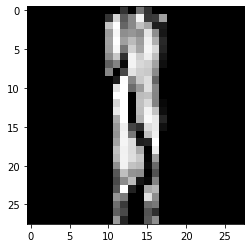

  2%|▏         | 194/10000 [00:10<08:51, 18.43it/s]

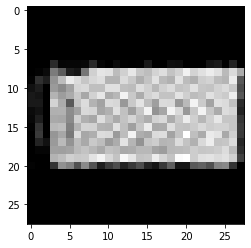

  3%|▎         | 268/10000 [00:14<08:46, 18.47it/s]

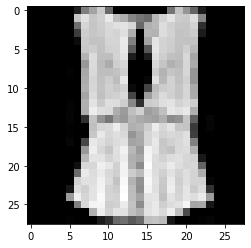

  7%|▋         | 667/10000 [00:37<08:24, 18.51it/s]

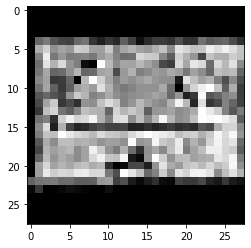

  8%|▊         | 762/10000 [00:42<09:11, 16.74it/s]

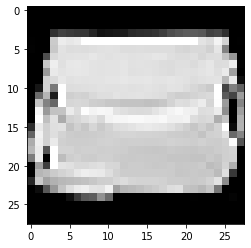

  9%|▉         | 936/10000 [00:52<08:42, 17.34it/s]

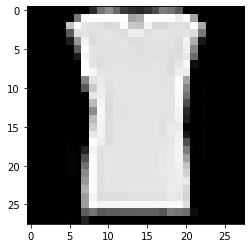

 12%|█▏        | 1180/10000 [01:07<07:50, 18.75it/s]

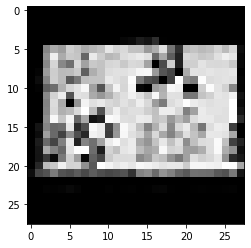

 12%|█▏        | 1206/10000 [01:08<08:33, 17.14it/s]

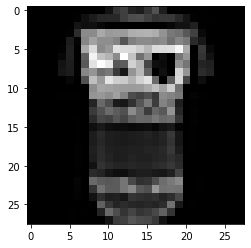

 16%|█▋        | 1641/10000 [01:33<08:22, 16.62it/s]

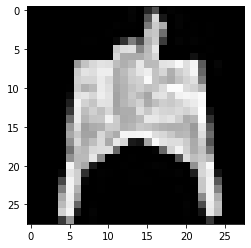

 17%|█▋        | 1691/10000 [01:36<08:01, 17.24it/s]

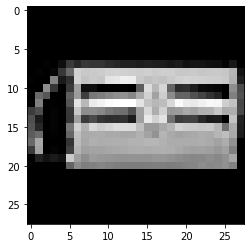

 18%|█▊        | 1777/10000 [01:42<07:15, 18.87it/s]

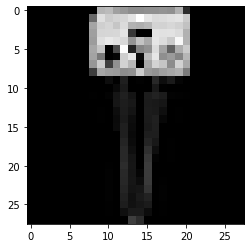

 18%|█▊        | 1846/10000 [01:46<07:32, 18.03it/s]

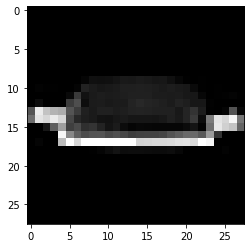

 20%|██        | 2020/10000 [01:56<07:01, 18.93it/s]

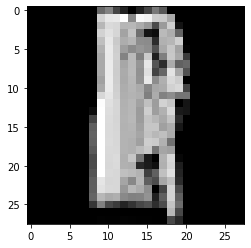

 21%|██        | 2074/10000 [01:59<07:36, 17.37it/s]

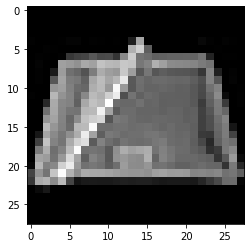

 21%|██        | 2090/10000 [02:01<07:48, 16.88it/s]

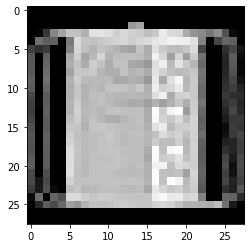

 25%|██▍       | 2492/10000 [02:24<07:06, 17.58it/s]

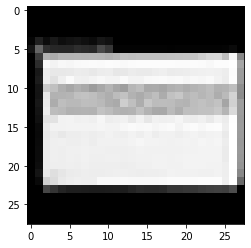

 27%|██▋       | 2735/10000 [02:38<06:49, 17.76it/s]

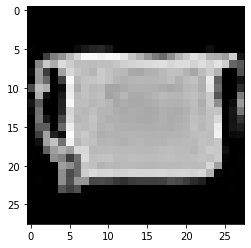

 30%|██▉       | 2983/10000 [02:52<06:33, 17.85it/s]

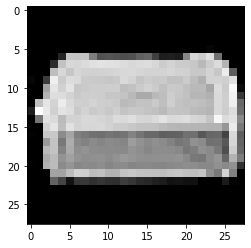

 31%|███▏      | 3131/10000 [03:00<06:23, 17.91it/s]

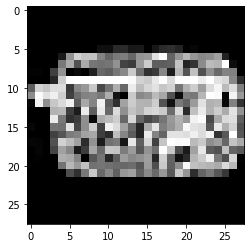

 31%|███▏      | 3133/10000 [03:00<08:57, 12.77it/s]

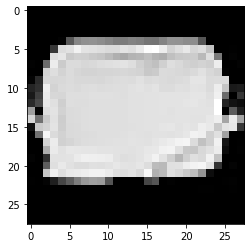

 32%|███▏      | 3228/10000 [03:06<06:19, 17.84it/s]

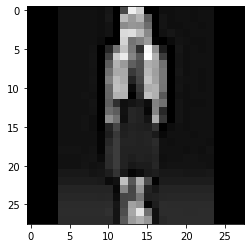

 32%|███▏      | 3238/10000 [03:07<06:30, 17.32it/s]

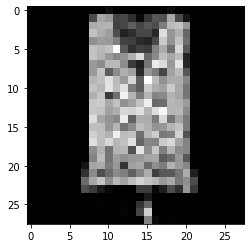

 34%|███▎      | 3360/10000 [03:14<06:04, 18.23it/s]

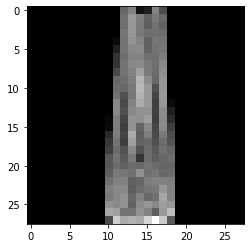

 35%|███▍      | 3466/10000 [03:20<05:41, 19.13it/s]

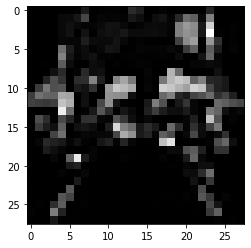

 35%|███▍      | 3473/10000 [03:20<06:44, 16.14it/s]

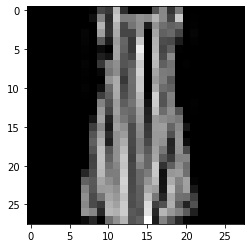

 35%|███▌      | 3515/10000 [03:23<05:41, 19.00it/s]

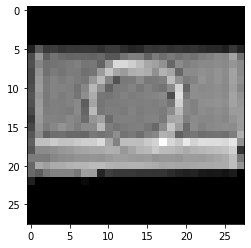

 35%|███▌      | 3548/10000 [03:25<06:06, 17.60it/s]

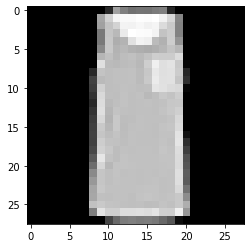

 37%|███▋      | 3741/10000 [03:35<05:42, 18.26it/s]

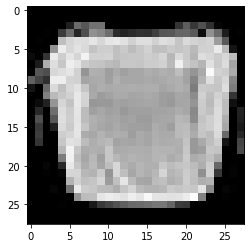

 37%|███▋      | 3743/10000 [03:35<07:50, 13.31it/s]

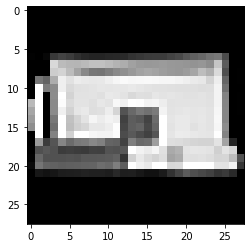

 39%|███▉      | 3939/10000 [03:46<05:07, 19.71it/s]

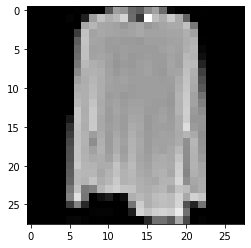

 41%|████      | 4070/10000 [03:53<05:32, 17.84it/s]

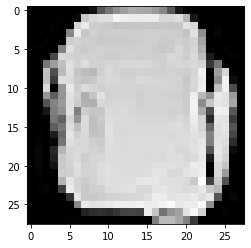

 42%|████▏     | 4185/10000 [04:00<05:35, 17.35it/s]

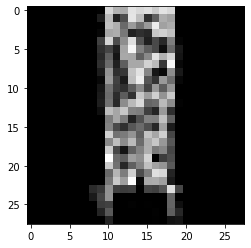

 42%|████▏     | 4247/10000 [04:04<05:28, 17.49it/s]

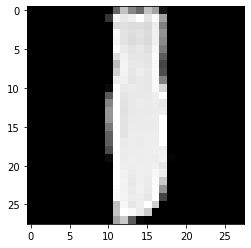

 45%|████▍     | 4491/10000 [04:18<04:53, 18.80it/s]

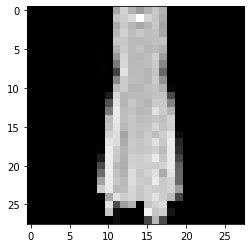

 46%|████▌     | 4563/10000 [04:22<05:42, 15.86it/s]

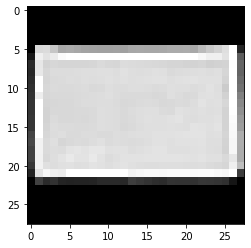

 46%|████▋     | 4639/10000 [04:27<04:59, 17.88it/s]

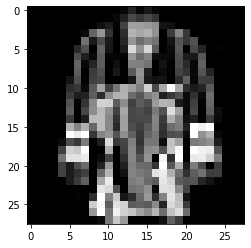

 48%|████▊     | 4835/10000 [04:38<05:13, 16.48it/s]

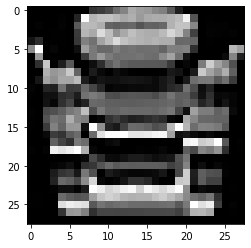

 49%|████▉     | 4928/10000 [04:44<04:33, 18.52it/s]

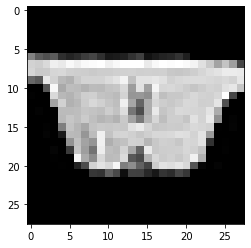

 49%|████▉     | 4939/10000 [04:45<04:50, 17.44it/s]

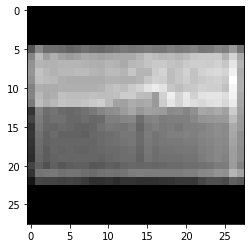

 50%|█████     | 5024/10000 [04:49<04:48, 17.24it/s]

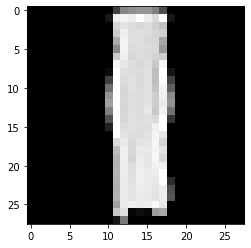

 51%|█████     | 5064/10000 [04:52<04:41, 17.56it/s]

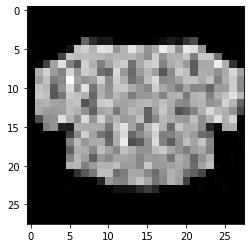

 51%|█████     | 5086/10000 [04:53<04:51, 16.84it/s]

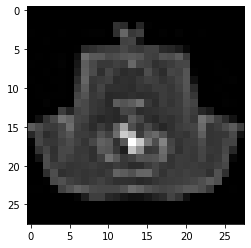

 51%|█████▏    | 5136/10000 [04:56<04:40, 17.36it/s]

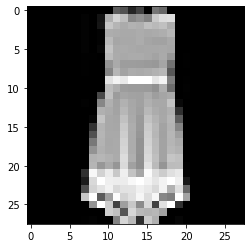

 51%|█████▏    | 5140/10000 [04:57<06:03, 13.37it/s]

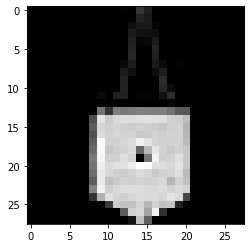

 53%|█████▎    | 5316/10000 [05:07<04:08, 18.86it/s]

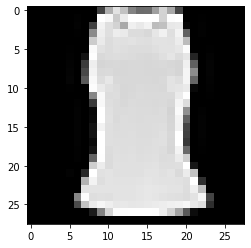

 54%|█████▍    | 5398/10000 [05:11<04:17, 17.87it/s]

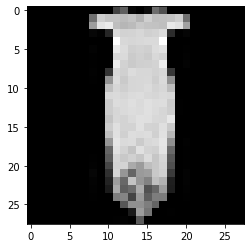

 58%|█████▊    | 5760/10000 [05:32<04:13, 16.72it/s]

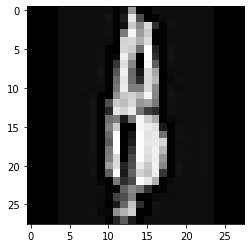

 60%|█████▉    | 5987/10000 [05:45<03:48, 17.56it/s]

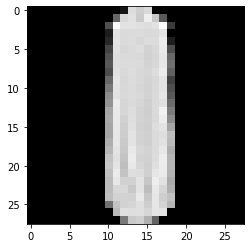

 61%|██████    | 6094/10000 [05:51<03:40, 17.68it/s]

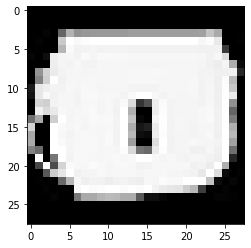

 64%|██████▎   | 6353/10000 [06:06<03:18, 18.34it/s]

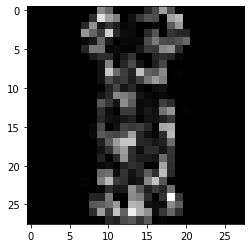

 64%|██████▍   | 6410/10000 [06:10<03:17, 18.15it/s]

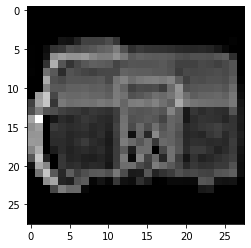

 64%|██████▍   | 6442/10000 [06:12<03:33, 16.65it/s]

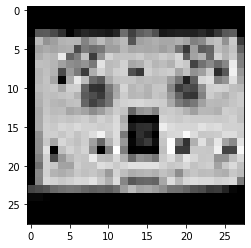

 71%|███████▏  | 7146/10000 [06:52<02:50, 16.76it/s]

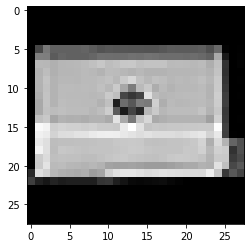

 72%|███████▏  | 7162/10000 [06:53<02:52, 16.49it/s]

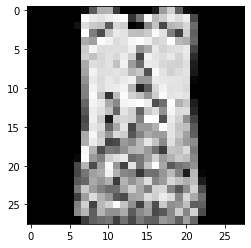

 74%|███████▍  | 7404/10000 [07:07<02:29, 17.33it/s]

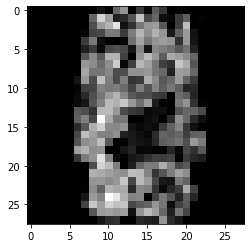

 76%|███████▌  | 7613/10000 [07:19<02:15, 17.63it/s]

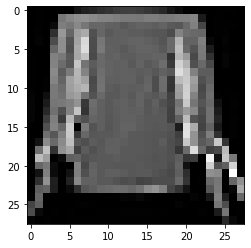

 78%|███████▊  | 7816/10000 [07:31<02:00, 18.20it/s]

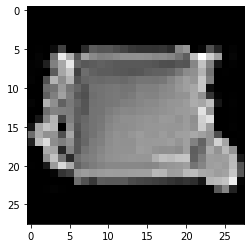

 80%|████████  | 8049/10000 [07:45<01:53, 17.22it/s]

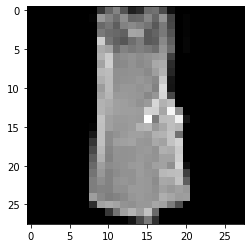

 86%|████████▌ | 8567/10000 [08:15<01:24, 17.03it/s]

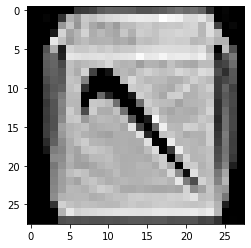

 86%|████████▌ | 8591/10000 [08:16<01:20, 17.44it/s]

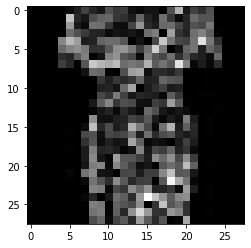

 86%|████████▌ | 8617/10000 [08:18<01:16, 18.05it/s]

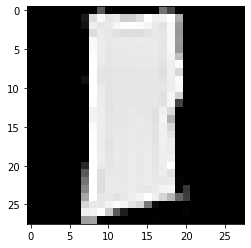

 87%|████████▋ | 8669/10000 [08:21<01:14, 17.87it/s]

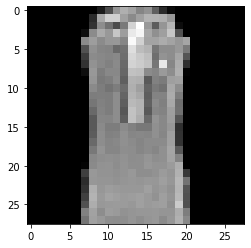

 88%|████████▊ | 8757/10000 [08:27<01:08, 18.11it/s]

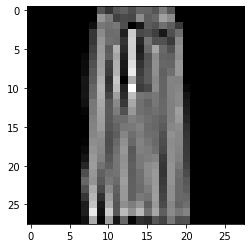

 91%|█████████ | 9094/10000 [08:46<00:58, 15.38it/s]

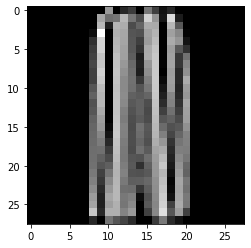

 92%|█████████▏| 9164/10000 [08:50<00:44, 18.84it/s]

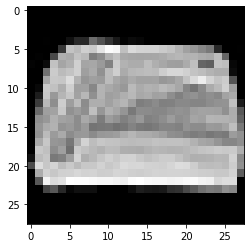

 92%|█████████▏| 9198/10000 [08:52<00:45, 17.70it/s]

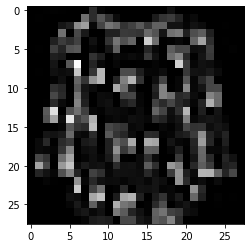

 92%|█████████▏| 9204/10000 [08:53<00:51, 15.32it/s]

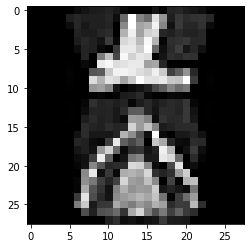

 92%|█████████▏| 9235/10000 [08:55<00:41, 18.53it/s]

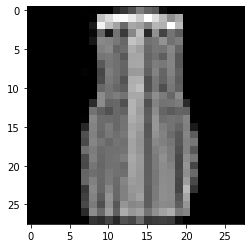

 94%|█████████▍| 9389/10000 [09:04<00:34, 17.82it/s]

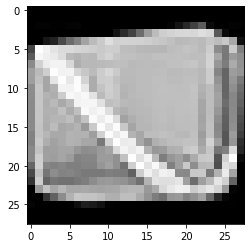

 95%|█████████▌| 9548/10000 [09:13<00:26, 16.82it/s]

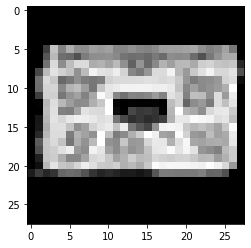

 96%|█████████▌| 9596/10000 [09:16<00:21, 18.69it/s]

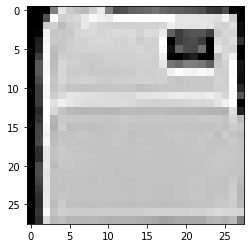

 96%|█████████▌| 9600/10000 [09:16<00:29, 13.47it/s]

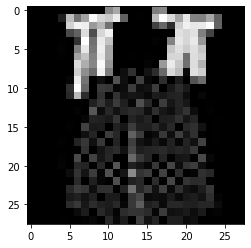

 97%|█████████▋| 9651/10000 [09:19<00:18, 18.69it/s]

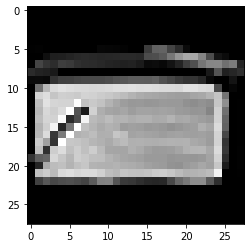

 97%|█████████▋| 9665/10000 [09:20<00:20, 16.62it/s]

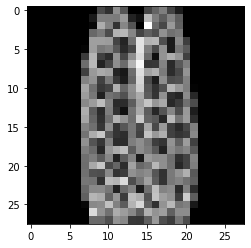

 97%|█████████▋| 9744/10000 [09:25<00:13, 18.44it/s]

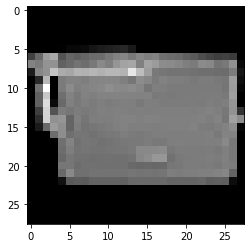

 99%|█████████▊| 9856/10000 [09:31<00:08, 16.88it/s]

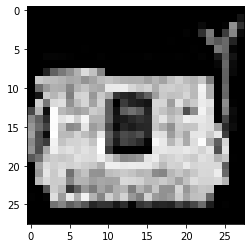

100%|██████████| 10000/10000 [09:40<00:00, 17.23it/s]


In [ ]:
from tqdm import tqdm
for i in tqdm(range(X_crossval.shape[0])):
  test_image=X_crossval[i]
  gt=Y_crossval[i]
  #print(test_image.shape,gt.shape)
  pred=np.argmax(model.predict(test_image.reshape(1,test_image.shape[0],test_image.shape[1],1)))
  #print(pred)
  if pred!=gt:
    plt.imshow(test_image.reshape((test_image.shape[0], test_image.shape[1])), interpolation='none', cmap='gray')
    plt.show()